# Part II - Ford GoBike System Data Exploration
## by Philip Obiorah

## Investigation Overview


> In this presentation we shall be looking at the relationship between gender and user type; the relationship between distance covered and trip duration; what day of the Week do riders spends the most time.



## Dataset Overview

> The dataset consisted of 183412 rows and 16 columns. After prelimiary wrangling and feature engineering we  are now left with (172207 bike rides that occurred in the year 2019 with 20 features(duration_sec,	start_time,	end_time,	start_station_id, start_station_name,	start_station_latitude,	start_station_longitude,	end_station_id,	end_station_name,	end_station_latitude,	end_station_longitude,	bike_id,	user_type,	member_birth_year,	member_gender,	bike_share_for_all_trip, day, month, member_age, distance_km).
     
        

In [15]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
from datetime import datetime as dt
%matplotlib inline


# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [16]:
# load in the dataset into a pandas dataframe
fordbike_clean = pd.read_csv('fordbike_clean.csv');


In [17]:
#Let define a function that would be used regulaly to label our visualizations
def label_visual(x_label, y_label, title):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    

In [18]:
#let define an order  for the chat base on weekdays (to be used subsequently)
weekdays = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

## Distribution of Bike rides in trip duration(sec)

> Initially duration_sec had a long-tailed distribution with very few rides at the high end duration. When plotted on a log-scale, most trip duration occured in less than 33mins 20 secs (2000 seconds ). The highest record of trips occured in 10mins (600 secs). The number of trips initially increases from around 8000 values at 0 to 12000 values at around 600 seconds, but then begins to fall, reaching below 2000 values in less than 33 minutes



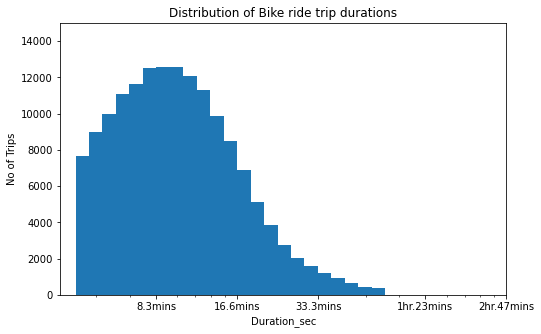

In [19]:
# There is a long tail in hte distribution , so let us put it on a log scale
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(fordbike_clean['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford_go_bike, x = 'duration_sec', bins = bins)
plt.title('Distribution of Bike ride trip durations')
plt.xlabel('Duration_sec')
plt.ylabel('No of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,  5e3, 1e4], ['8.3mins', '16.6mins', '33.3mins', '1hr.23mins', '2hr.47mins'])
plt.axis([0, 10000, 0, 15000])
plt.show()

## Relationship between distance(km) covered and trip duration(sec)

>The regression line in the scatter plot shows a positive correlation bwtween distance covered and duration

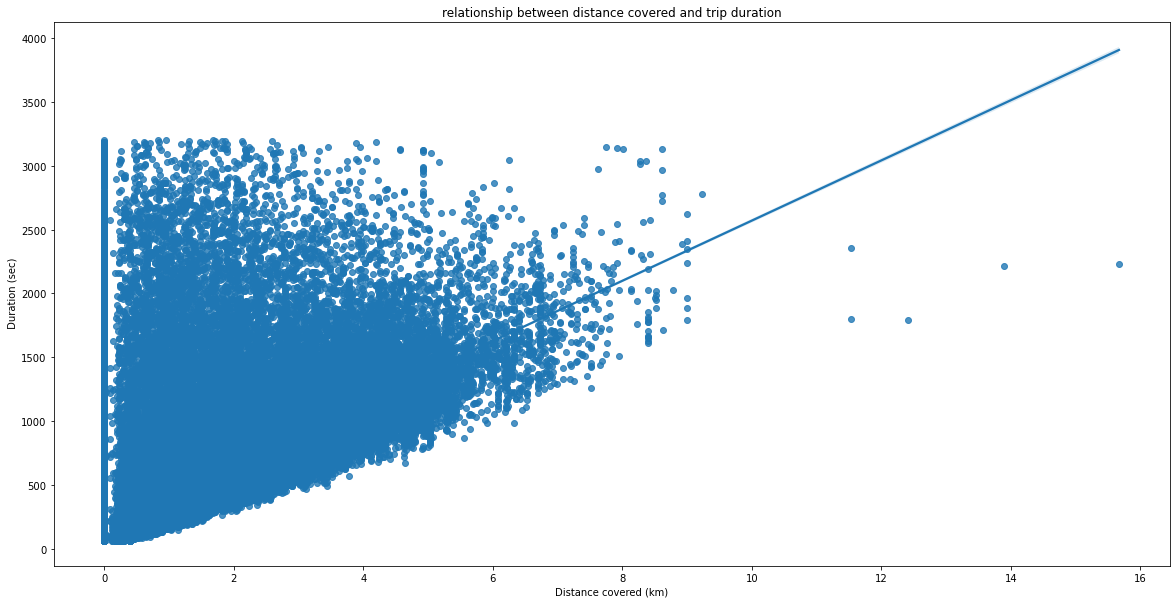

In [20]:
#the  relationship between distance covered and trip duration
plt.figure(figsize= [20, 10])
sb.regplot(data = fordbike_clean, x = 'distance_km', y='duration_sec')
label_visual('Distance covered (km)', ' Duration (sec)', 'relationship between distance covered and trip duration')



## Bike usage distribution by Weekday

> The distribution shows Thursdays had the highest usage, followed by Tuesdays and Fridays. Saturdays and Sundays saw a significant decrease in usage. This suggests that bikes are mostly used during the week and/or that people prefer to stay at home on weekends, resulting in less use of bikes.

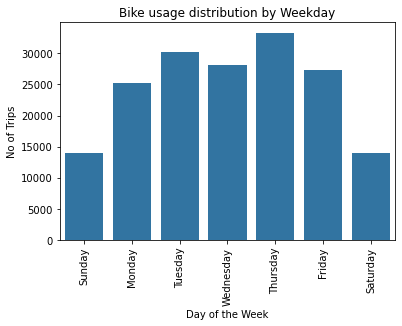

In [21]:
# plotting with one base color
base_color = sb.color_palette()[0]

sb.countplot(data = fordbike_clean, x = 'day', order=weekdays, color=base_color);
label_visual("Day of the Week", "No of Trips", "Bike usage distribution by Weekday")

plt.xticks(rotation=90);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [26]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 786591 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
^C

Interrupted


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 